#Self Organizing Map

##Install MiniSom Package

In [1]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset= pd.read_csv('Credit_Card_Applications.csv')
X= dataset.iloc[:, :-1].values
y= dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
X= sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom
som= MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data= X, num_iteration= 100)

##Visualizing the results


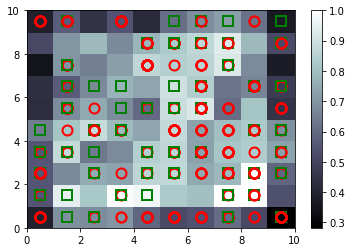

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers= ['o', 's']
colors= ['red', 'green']
for i, x in enumerate(X):
  w= som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor= colors[y[i]],
       markerfacecolor= 'None',
       markersize=10,
       markeredgewidth=2)
show()

## Finding the frauds


In [8]:
mappings= som.win_map(X)
frauds= np.concatenate((mappings[(3,1)],mappings[(7,1)],mappings[(8,1)], mappings[(8,2)]), axis=0)
frauds= sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [9]:
for i in frauds[:, 0]:
  print(int(i))

15790254
15768600
15748552
15757467
15801441
15815443
15748432
15788131
15699963
15771856
15648876
15696287
15808023
15808386
15698749
15764841
15748649
15729718
15786539
15773776
15791769
15660390
15608595
15577515
15644878
15666166
15605872
15667934
15796813
15731166
15649379
15800773
15729771
15701687
15751167
15721507
15636562
15711249
15812766
15658504
